<a href="https://colab.research.google.com/github/rishabh3562/DA/blob/main/colab/reddit_post_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install praw asyncpraw pymongo pandas motor

In [23]:
import asyncio
import nest_asyncio

nest_asyncio.apply()  # Apply fix once

async def run_async(coro):
    """Runs an async function properly in both normal and Colab environments."""
    loop = asyncio.get_event_loop()
    if loop.is_running():
        return await coro  # ✅ Await directly in Colab
    else:
        return asyncio.run(coro)  # Normal execution


In [24]:
import praw
from google.colab import userdata

In [25]:
client_id = userdata.get("reddit_client_id")
assert client_id is not None
client_secret = userdata.get("reddit_client_secret")
assert client_secret is not None
username = userdata.get("reddit_username")
assert username is not None
password = userdata.get("reddit_password")
assert password is not None
app_name = userdata.get("reddit_app")
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=app_name,
                     username=username, \
                     password=password)


In [26]:
def test(username):
  comms = list(reddit.redditor(username).comments.new(limit=5))
  return comms[0].body

In [27]:
test("thisisbillgates")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



'Source Code is the story of everything that led up to the creation of Microsoft. But it’s also a book about not fitting in, sneaking out, playing cards, hiking mountains, and forming friendships that changed my life. I’m excited for you to read it: [https://gatesnot.es/4gqOmbQ](https://gatesnot.es/4gqOmbQ)'

In [28]:
print(reddit.user.me())  # Should return your Reddit username if authenticated


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Top_Marsupial_1135


In [29]:
import asyncpraw
import nest_asyncio
import asyncio

nest_asyncio.apply()  # Fix for Google Colab

async def main():
    reddit = asyncpraw.Reddit(
        client_id=userdata.get("reddit_client_id"),
        client_secret=userdata.get("reddit_client_secret"),
        user_agent=userdata.get("reddit_app"),
        username=userdata.get("reddit_username"),
        password=userdata.get("reddit_password"),
    )

    user = await reddit.user.me()  # Async call
    print(f"Logged in as: {user}")

asyncio.get_event_loop().run_until_complete(main())  # Run async function in Colab


Logged in as: Top_Marsupial_1135


In [30]:
import asyncpraw

async def main():
    reddit = asyncpraw.Reddit(
        client_id=userdata.get("reddit_client_id"),
        client_secret=userdata.get("reddit_client_secret"),
        user_agent=userdata.get("reddit_app"),
        username=userdata.get("reddit_username"),
        password=userdata.get("reddit_password"),
    )
    user = await reddit.user.me()
    print(f"Logged in as: {user}")

await run_async(main())  # ✅ Works properly in Colab


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d7054c55a10>
ERROR:asyncio:Unclosed connector
connections: ['deque([(<aiohttp.client_proto.ResponseHandler object at 0x7d704d6cf1c0>, 449.626659105)])']
connector: <aiohttp.connector.TCPConnector object at 0x7d7054c57d10>


Logged in as: Top_Marsupial_1135


In [31]:
from motor.motor_asyncio import AsyncIOMotorClient

async def connect_mongo(uri: str, db_name: str):
    """Connect to MongoDB and return the database instance."""
    client = AsyncIOMotorClient(uri)
    return client[db_name]  # Return database instance
async def test_mongo_connection(db):
    """Check if MongoDB connection is successful."""
    try:
        await db.command("ping")  # Send a ping to MongoDB
        print("✅ MongoDB connection successful!")
    except Exception as e:
        print(f"❌ MongoDB connection failed: {e}")


In [32]:
import asyncio

MONGO_URI = userdata.get("MONGO_URI")
if not MONGO_URI:
    raise ValueError("MONGO_URI is not set")

DB_NAME = "mydatabase"

async def main():
    db = await connect_mongo(MONGO_URI, DB_NAME)
    await test_mongo_connection(db)  # Test connection

await run_async(main()) 


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d7055b3d150>
ERROR:asyncio:Unclosed connector
connections: ['deque([(<aiohttp.client_proto.ResponseHandler object at 0x7d704d6cf070>, 455.463302295)])']
connector: <aiohttp.connector.TCPConnector object at 0x7d7054c6bc90>


✅ MongoDB connection successful!


In [33]:
import asyncpraw

async def scrape_reddit(subreddit_name, query, limit=50):
    """Scrape Reddit for posts related to the given query and close the session properly."""
    reddit = asyncpraw.Reddit(
        client_id=userdata.get("reddit_client_id"),
        client_secret=userdata.get("reddit_client_secret"),
        user_agent=userdata.get("reddit_app"),
        username=userdata.get("reddit_username"),
        password=userdata.get("reddit_password"),
    )

    subreddit = await reddit.subreddit(subreddit_name)
    posts = []

    try:
        async for post in subreddit.search(query, limit=limit):
            posts.append({
                "title": post.title,
                "selftext": post.selftext,
                "score": post.score,
                "num_comments": post.num_comments,
                "url": post.url,
                "created_utc": post.created_utc,
                "query": query
            })
    except Exception as e:
        print(f"⚠️ Error scraping {query}: {e}")

    await reddit.close()  # ✅ Explicitly close the Reddit client
    return posts



In [34]:
async def save_to_mongo(db, collection_name, data):
    """Save scraped data into MongoDB."""
    collection = db[collection_name]
    if data:
        await collection.insert_many(data)
        print(f"✅ Inserted {len(data)} records into {collection_name}")
    else:
        print("⚠️ No data to insert!")


In [35]:
MONGO_URI = userdata.get("MONGO_URI")
if not MONGO_URI:
    raise ValueError("MONGO_URI is not set")
DB_NAME = "reddit_sentiments"

async def main():
    db = await connect_mongo(MONGO_URI, DB_NAME)

    ai_queries = ["DeepSeek AI", "ChatGPT", "Claude AI", "Gemini AI"]
    for ai in ai_queries:
        print(f"🔍 Scraping Reddit for: {ai}")
        posts = await scrape_reddit("all", ai, limit=500)  # ✅ Use "all" instead of a specific subreddit
        await save_to_mongo(db, "reddit_posts", posts)

    print("✅ All data scraped & saved!")

await run_async(main())



🔍 Scraping Reddit for: DeepSeek AI
✅ Inserted 250 records into reddit_posts
🔍 Scraping Reddit for: ChatGPT
✅ Inserted 241 records into reddit_posts
🔍 Scraping Reddit for: Claude AI
✅ Inserted 243 records into reddit_posts
🔍 Scraping Reddit for: Gemini AI
✅ Inserted 245 records into reddit_posts
✅ All data scraped & saved!


In [36]:
import pandas as pd
from motor.motor_asyncio import AsyncIOMotorClient
MONGO_URI = userdata.get("MONGO_URI")
if not MONGO_URI:
    raise ValueError("MONGO_URI is not set")
DB_NAME = "reddit_sentiments"
COLLECTION_NAME = "reddit_posts"

async def load_data_from_mongo():
    """Load data from MongoDB into a Pandas DataFrame."""
    client = AsyncIOMotorClient(MONGO_URI)
    db = client[DB_NAME]
    collection = db[COLLECTION_NAME]

    cursor = collection.find()  # Get all documents
    data = await cursor.to_list(length=None)  # Convert to list

    df = pd.DataFrame(data)  # Convert to DataFrame
    return df

df = await load_data_from_mongo()
df.head()  # Display first 5 rows


,_id,title,selftext,score,num_comments,url,created_utc,query
0,67a5f65168b42800b8dbf1ec,How China’s new AI model DeepSeek is threateni...,,3912,661,https://www.cnbc.com/2025/01/24/how-chinas-new...,1.737854e+09,DeepSeek AI
1,67a5f65168b42800b8dbf1ed,Deepseek claims they beat OpenAI's 01 model on...,"Did anyone see this article about Deepseek, a ...",308,180,https://www.reddit.com/r/OpenAI/comments/1hqji...,1.735666e+09,DeepSeek AI
2,67a5f65168b42800b8dbf1ee,Billionaire and Scale AI CEO Alexandr Wang: De...,,1449,506,https://v.redd.it/pm2ecj3niyee1,1.737731e+09,DeepSeek AI
3,67a5f65168b42800b8dbf1ef,Meta AI in panic mode as free open-source Deep...,,17563,1214,https://techstartups.com/2025/01/24/meta-ai-in...,1.737940e+09,DeepSeek AI
4,67a5f65168b42800b8dbf1f0,Latest Chinese AI,🤓,3241,820,https://www.reddit.com/gallery/1ho7oi4,1.735399e+09,DeepSeek AI


from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['created_utc'].plot(kind='hist', bins=20, title='created_utc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('selftext').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('url').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='score', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='num_comments', y='created_utc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['created_utc'].plot(kind='line', figsize=(8, 4), title='created_utc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_12.groupby('_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_id')
_ = plt.ylabel('title')

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['selftext'].value_counts()
    for x_label, grp in _df_13.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('selftext')

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['url'].value_counts()
    for x_label, grp in _df_14.groupby('selftext')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('selftext')
_ = plt.ylabel('url')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='score', y='_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='score', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['selftext'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='score', y='selftext', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['url'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='score', y='url', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

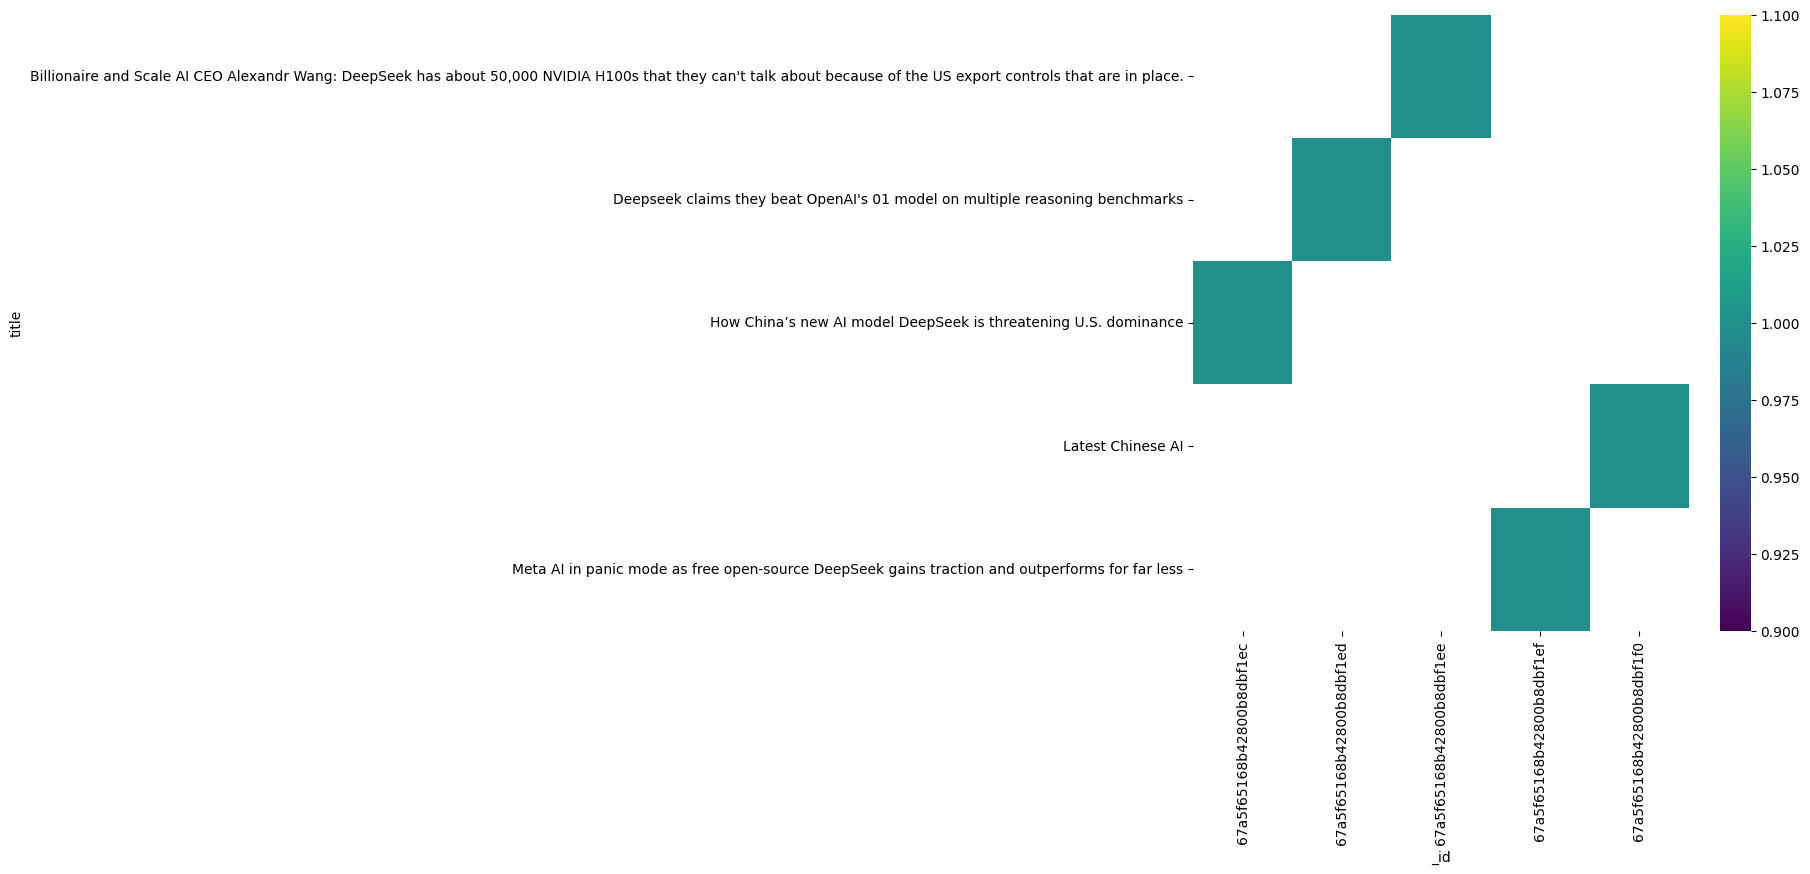

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_12.groupby('_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_id')
_ = plt.ylabel('title')

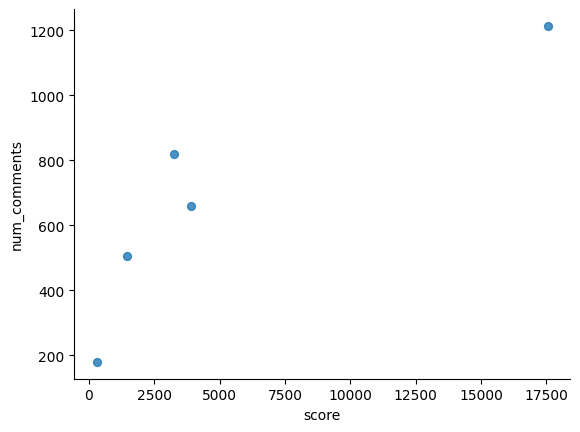

In [42]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='score', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

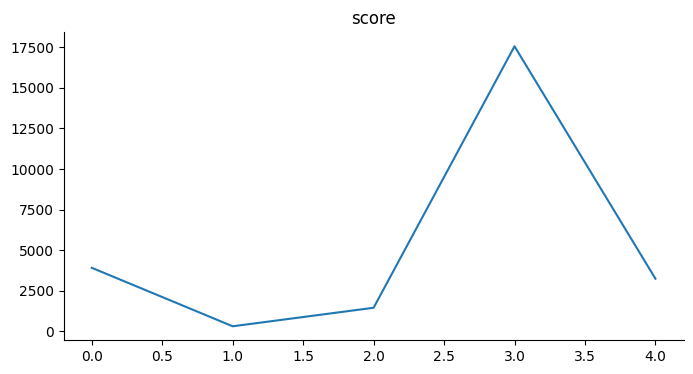

In [39]:
from matplotlib import pyplot as plt
_df_9['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

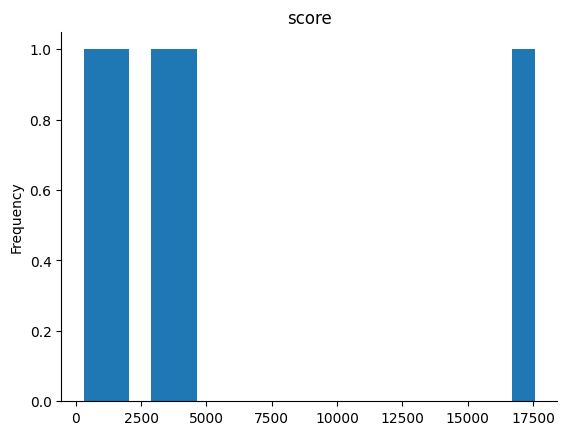

In [38]:
from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
df.describe()

,score,num_comments,created_utc
count,3337.000000,3337.000000,3.337000e+03
mean,3893.586755,392.946359,1.724045e+09
std,7789.448229,666.048369,1.734825e+07
min,0.000000,1.000000,1.659108e+09
25%,195.000000,68.000000,1.711295e+09
50%,768.000000,165.000000,1.731933e+09
75%,3853.000000,458.000000,1.737984e+09
max,67645.000000,8933.000000,1.738926e+09
